In [2]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

Survived:    Survival 
PassengerId: Unique Id of a passenger. 
Pclass:    Ticket class     
Sex:    Sex     
Age:    Age in years     
Sibsp:    # of siblings / spouses aboard the Titanic     
Parch:    # of parents / children aboard the Titanic     
Ticket:    Ticket number     
Fare:    Passenger fare     
Cabin:    Cabin number     
Embarked:    Port of Embarkation

In [40]:
dfTitanicTrain = pd.read_csv('train.csv')
print(dfTitanicTrain.count())
print(dfTitanicTrain.dtypes)
dfTitanicTrain.head()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dfTitanicTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
total = dfTitanicTrain.isnull().sum().sort_values(ascending=False)
percent_1 = dfTitanicTrain.isnull().sum()/dfTitanicTrain.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [7]:
dfTitanicTrain['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [8]:
dfTitanicTrain['Age'].mean()

29.69911764705882

In [19]:
dfTitanicTrain['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 24.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [41]:
dfTitanicTrain['Age'].fillna(dfTitanicTrain['Age'].mode()[0], inplace=True).astype(int)


AttributeError: 'NoneType' object has no attribute 'astype'

c:\Users\rypi3\Documents\Kaggle\KaggleComp\virEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


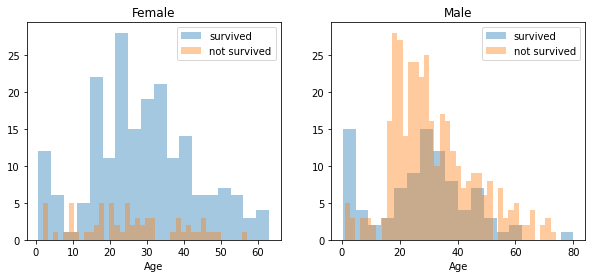

In [7]:
# data visualization
import seaborn as sns

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = dfTitanicTrain[dfTitanicTrain['Sex']=='female']
men = dfTitanicTrain[dfTitanicTrain['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [23]:
def notAlone(row):
    if row['SibSp'] > 0 or row['Parch'] > 0:
        return 1
    return 0

In [24]:
dfTitanicTrain['notAlone'] = dfTitanicTrain.apply(lambda row: notAlone(row), axis=1)

In [27]:
data = [dfTitanicTrain]#, dfTitanicTest]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
##train_df = train_df.drop(['Name'], axis=1)
#test_df = test_df.drop(['Name'], axis=1)

In [29]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [dfTitanicTrain]#, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature

In [32]:
    dfTitanicTrain['Fare'].fillna(dfTitanicTrain['Fare'].mode()[0], inplace=True)


In [33]:
dfTitanicTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MaleChild,NotAlone,notAlone,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,0,1,1,1,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,1,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,0,0,0,2,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,1,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,0,0,0,1,8


In [17]:
dfTitanicTrain.query('Age < 10')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MaleChild
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,0
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,1
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S,0
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,1
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,1
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S,1
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,NaN,C,0


In [18]:
dfTitanicTrain['NotAlone'] = dfTitanicTrain['SibSp'] + dfTitanicTrain['Parch']

In [19]:
dfTitanicTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MaleChild,NotAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [21]:
dfTitanicTrain['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
dfTitanicTrain.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
dfTitanicTrain['Age'].fillna(dfTitanicTrain['Age'].mode()[0], inplace=True)

In [ ]:
def changepoint(row):
    if row['PricePerUnit'] >= row['LowerBound'] and row['PricePerUnit'] < row['UpperBound']:
        return 'Price is in bounds'
    return 'Price is out of bounds'
dfCP['ChangePoint'] = dfCP.apply(lambda row: changepoint(row), axis=1)

In [ ]:
def cabinLevel(row):
    if row['Cabin'] == 'nan' and row['prev_dx'] == 268.9:
        return 0.5 + 2
    elif row['v_flag'] == 1 and row['prev_dx'] == 172.9:
        return 0.5 + 5
    elif row['v_flag'] == 0 and row['prev_dx'] == 897.2:
        return 0.5 + 2
    elif row['v_flag'] == 0 and row['prev_dx'] == 897.6:
        return 0.5 + 3
    return '-1'

In [39]:
dfTitanicTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinClass,ChangePoint
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,99.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,99.0


In [16]:
dfTitanicTrain['CabinClass'] = dfTitanicTrain.Cabin.str[0].isin(['C'])

In [17]:
dfTitanicTrain.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [12]:
dfTitanicTrain['CabinClass'] = dfTitanicTrain['Cabin'].apply(lambda row: cabinLevel(row))

AttributeError: 'float' object has no attribute 'str'

In [49]:
dfTitanicTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [72]:
dfTitanicTrain.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
dfTitanicTrain.CabinClass.value_counts()

False    832
True      59
Name: CabinClass, dtype: int64

In [75]:
oneHotSex = pd.get_dummies(dfTitanicTrain.Sex, prefix='Sex')
oneHotCabin = pd.get_dummies(dfTitanicTrain.Cabin, prefix='Cabin')
oneHotEmbarked = pd.get_dummies(dfTitanicTrain.Embarked, prefix='Embarked')

In [41]:
oneHotSex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [42]:
oneHotCabin.head()

,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
oneHotEmbarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [81]:
dfTrain = dfTitanicTrain.join(oneHotSex)
dfTrain = dfTrain.join(oneHotCabin)
dfTrain = dfTrain.join(oneHotEmbarked)

In [51]:
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,0


In [77]:
print(dfTrain.columns)
print(oneHotSex.columns)
print(oneHotCabin.columns)
print(oneHotEmbarked.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare',
       ...
       'Cabin_E8', 'Cabin_F E69', 'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2',
       'Cabin_F33', 'Cabin_F38', 'Cabin_F4', 'Cabin_G6', 'Cabin_T'],
      dtype='object', length=161)
Index(['Sex_female', 'Sex_male'], dtype='object')
Index(['Cabin_A10', 'Cabin_A14', 'Cabin_A16', 'Cabin_A19', 'Cabin_A20',
       'Cabin_A23', 'Cabin_A24', 'Cabin_A26', 'Cabin_A31', 'Cabin_A32',
       ...
       'Cabin_E8', 'Cabin_F E69', 'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2',
       'Cabin_F33', 'Cabin_F38', 'Cabin_F4', 'Cabin_G6', 'Cabin_T'],
      dtype='object', length=147)
Index(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype='object')


In [107]:
X = dfTrain[[ 'Pclass', 'Sex_female', 'Embarked_C', 'Embarked_S', 'Embarked_S']]

y = dfTrain['Survived']

In [108]:
# test classification dataset
from collections import Counter
from sklearn.datasets import make_classification
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=2, random_state=1)
# summarize the dataset
print(X.shape, y.shape)
print(Counter(y))

(891, 5) (891,)
Counter({0: 549, 1: 342})


In [84]:
print(X)
print(y)

     PassengerId  Pclass  Sex_female   Age  Cabin_A14  Embarked_C  Embarked_S  \
0              1       3           0  22.0          0           0           1   
1              2       1           1  38.0          0           1           0   
2              3       3           1  26.0          0           0           1   
3              4       1           1  35.0          0           0           1   
4              5       3           0  35.0          0           0           1   
..           ...     ...         ...   ...        ...         ...         ...   
886          887       2           0  27.0          0           0           1   
887          888       1           1  19.0          0           0           1   
888          889       3           1   NaN          0           0           1   
889          890       1           0  26.0          0           1           0   
890          891       3           0  32.0          0           0           0   

     Embarked_S  
0        

In [109]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')


In [110]:
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
##n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
#print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [111]:
model.fit(X,y)

LogisticRegression(multi_class='multinomial')

In [112]:
model.classes_

array([0, 1], dtype=int64)

In [113]:
model.intercept_

array([0.43650829])

In [114]:
model.coef_

array([[-0.46438839,  1.28652779,  0.06637895, -0.10189491, -0.10189491]])

In [94]:
model.predict_proba(X)

array([[0.91313473, 0.08686527],
       [0.07111197, 0.92888803],
       [0.43894368, 0.56105632],
       ...,
       [0.40475111, 0.59524889],
       [0.47186787, 0.52813213],
       [0.88500988, 0.11499012]])

In [95]:
model.predict(X)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [115]:
model.score(X, y)

0.7777777777777778

In [116]:
confusion_matrix(y, model.predict(X))

array([[443, 106],
       [ 92, 250]], dtype=int64)

In [117]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       549
           1       0.70      0.73      0.72       342

    accuracy                           0.78       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891



In [118]:
dfTitanicTest = pd.read_csv('test.csv')
print(dfTitanicTest.count())
dfTitanicTest.head()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [119]:
oneHotSex = pd.get_dummies(dfTitanicTest.Sex, prefix='Sex')
oneHotCabin = pd.get_dummies(dfTitanicTest.Cabin, prefix='Cabin')
oneHotEmbarked = pd.get_dummies(dfTitanicTest.Embarked, prefix='Embarked')

In [120]:
dfTest = dfTitanicTest.join(oneHotSex)
dfTest = dfTest.join(oneHotCabin)
dfTest = dfTest.join(oneHotEmbarked)

In [123]:
dfToBeScored = dfTest[['Pclass', 'Sex_female',  'Embarked_C', 'Embarked_S', 'Embarked_S']]

In [182]:
score = pd.DataFrame(model.predict(dfToBeScored), columns=['Survived'])

In [176]:
PassengerId = pd.DataFrame(dfTest['PassengerId'])

In [183]:
submission = PassengerId.join(score)

In [184]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [185]:
submission.to_csv('submission.csv', index=False)